In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder
import requests
import io

In [2]:
url = "https://docs.google.com/spreadsheets/d/e/2PACX-1vSKPTbVLdqwoqthxCMJXggR1goqDWh3lXQm-SeHIFOXuEkAQgW2o0crK8Vu5Fgkfg/pub?gid=676668986&single=true&output=csv"
df = pd.read_csv(url)   #Import the dataset and explore basic info (nulls, data types).
print(df.head())
print(df.info())
print(df.isnull().sum())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
<c

<Axes: >

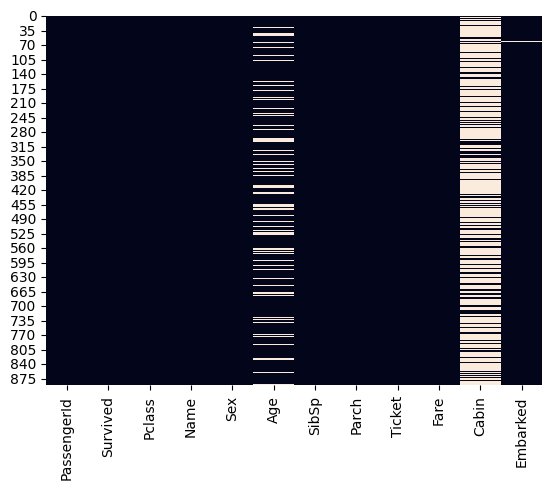

In [3]:
sns.heatmap(df.isnull(), cbar=False)   #visualize the missing values

In [4]:
df['Age'] = df['Age'].fillna(df['Age'].median())             #Handle missing values using mean/median/imputation.
df['Embarked']=df['Embarked'].fillna(df['Embarked'].mode()[0])

In [5]:
df['HasCabin'] = df['Cabin'].notnull().astype(int)
df.drop('Cabin', axis=1, inplace=True)

In [6]:
print(df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Embarked  HasCabin  
0      0         A/5 21171   7.2500        S         0  
1      0          PC 17599  71.2833        C         1  
2      0  STON/O2. 3101282   7.9250        S         0  
3      0            113803  53.1000        S         1  
4      0            373450   8.0500

In [7]:
df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)

In [8]:
df['Title'] = df['Name'].str.extract(r' ([A-Za-z]+)\.', expand=False)
df['Title'] = df['Title'].replace(['Lady', 'Countess','Capt','Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir','Jonkheer', 'Dona'], 'Other')
df['Title'] = df['Title'].replace({'Mlle': 'Miss', 'Ms': 'Miss', 'Mme': 'Mrs'})
df = pd.get_dummies(df, columns=['Title'], drop_first=True)
df.drop('Name', axis=1, inplace=True)

In [9]:
print(df.head())

   PassengerId  Survived  Pclass   Age  SibSp  Parch            Ticket  \
0            1         0       3  22.0      1      0         A/5 21171   
1            2         1       1  38.0      1      0          PC 17599   
2            3         1       3  26.0      0      0  STON/O2. 3101282   
3            4         1       1  35.0      1      0            113803   
4            5         0       3  35.0      0      0            373450   

      Fare  HasCabin  Sex_male  Embarked_Q  Embarked_S  Title_Miss  Title_Mr  \
0   7.2500         0      True       False        True       False      True   
1  71.2833         1     False       False       False       False     False   
2   7.9250         0     False       False        True        True     False   
3  53.1000         1     False       False        True       False     False   
4   8.0500         0      True       False        True       False      True   

   Title_Mrs  Title_Other  
0      False        False  
1       True      

In [10]:
# Function to extract prefix
def extract_prefix(ticket):
    ticket = ticket.strip()  # Step 1
    parts = ticket.split()   # Step 2
    return parts[0] if not parts[0].isdigit() else 'None'  # Step 3
df['Ticket_Prefix'] = df['Ticket'].apply(extract_prefix)

In [11]:
print(df.head())

   PassengerId  Survived  Pclass   Age  SibSp  Parch            Ticket  \
0            1         0       3  22.0      1      0         A/5 21171   
1            2         1       1  38.0      1      0          PC 17599   
2            3         1       3  26.0      0      0  STON/O2. 3101282   
3            4         1       1  35.0      1      0            113803   
4            5         0       3  35.0      0      0            373450   

      Fare  HasCabin  Sex_male  Embarked_Q  Embarked_S  Title_Miss  Title_Mr  \
0   7.2500         0      True       False        True       False      True   
1  71.2833         1     False       False       False       False     False   
2   7.9250         0     False       False        True        True     False   
3  53.1000         1     False       False        True       False     False   
4   8.0500         0      True       False        True       False      True   

   Title_Mrs  Title_Other Ticket_Prefix  
0      False        False       

In [12]:
df.drop('Ticket', axis=1, inplace=True)

In [13]:
print(df.head())

   PassengerId  Survived  Pclass   Age  SibSp  Parch     Fare  HasCabin  \
0            1         0       3  22.0      1      0   7.2500         0   
1            2         1       1  38.0      1      0  71.2833         1   
2            3         1       3  26.0      0      0   7.9250         0   
3            4         1       1  35.0      1      0  53.1000         1   
4            5         0       3  35.0      0      0   8.0500         0   

   Sex_male  Embarked_Q  Embarked_S  Title_Miss  Title_Mr  Title_Mrs  \
0      True       False        True       False      True      False   
1     False       False       False       False     False       True   
2     False       False        True        True     False      False   
3     False       False        True       False     False       True   
4      True       False        True       False      True      False   

   Title_Other Ticket_Prefix  
0        False           A/5  
1        False            PC  
2        False      STO

In [14]:
print(df['Ticket_Prefix'].value_counts())


Ticket_Prefix
None          661
PC             60
C.A.           27
STON/O         12
A/5            10
W./C.           9
SOTON/O.Q.      8
CA.             8
A/5.            7
SOTON/OQ        7
CA              6
STON/O2.        6
F.C.C.          5
SC/PARIS        5
C               5
S.O.C.          5
SC/Paris        4
LINE            4
PP              3
A/4.            3
A/4             3
S.O./P.P.       3
SC/AH           3
A./5.           2
P/PP            2
A.5.            2
WE/P            2
SOTON/O2        2
S.C./PARIS      2
S.C./A.4.       1
Fa              1
S.O.P.          1
SO/C            1
S.P.            1
W.E.P.          1
A4.             1
A/S             1
SC              1
SW/PP           1
SCO/W           1
W/C             1
S.W./PP         1
F.C.            1
C.A./SOTON      1
Name: count, dtype: int64


In [15]:
df = pd.get_dummies(df, columns=['Ticket_Prefix'], drop_first=True)


In [16]:
print(df.head())

   PassengerId  Survived  Pclass   Age  SibSp  Parch     Fare  HasCabin  \
0            1         0       3  22.0      1      0   7.2500         0   
1            2         1       1  38.0      1      0  71.2833         1   
2            3         1       3  26.0      0      0   7.9250         0   
3            4         1       1  35.0      1      0  53.1000         1   
4            5         0       3  35.0      0      0   8.0500         0   

   Sex_male  Embarked_Q  ...  Ticket_Prefix_SOTON/O.Q.  \
0      True       False  ...                     False   
1     False       False  ...                     False   
2     False       False  ...                     False   
3     False       False  ...                     False   
4      True       False  ...                     False   

   Ticket_Prefix_SOTON/O2  Ticket_Prefix_SOTON/OQ  Ticket_Prefix_STON/O  \
0                   False                   False                 False   
1                   False                   False 

In [17]:
scaler = StandardScaler()
df[['Age', 'Fare']] = scaler.fit_transform(df[['Age', 'Fare']])

In [18]:
print(df.head())

   PassengerId  Survived  Pclass       Age  SibSp  Parch      Fare  HasCabin  \
0            1         0       3 -0.565736      1      0 -0.502445         0   
1            2         1       1  0.663861      1      0  0.786845         1   
2            3         1       3 -0.258337      0      0 -0.488854         0   
3            4         1       1  0.433312      1      0  0.420730         1   
4            5         0       3  0.433312      0      0 -0.486337         0   

   Sex_male  Embarked_Q  ...  Ticket_Prefix_SOTON/O.Q.  \
0      True       False  ...                     False   
1     False       False  ...                     False   
2     False       False  ...                     False   
3     False       False  ...                     False   
4      True       False  ...                     False   

   Ticket_Prefix_SOTON/O2  Ticket_Prefix_SOTON/OQ  Ticket_Prefix_STON/O  \
0                   False                   False                 False   
1                   

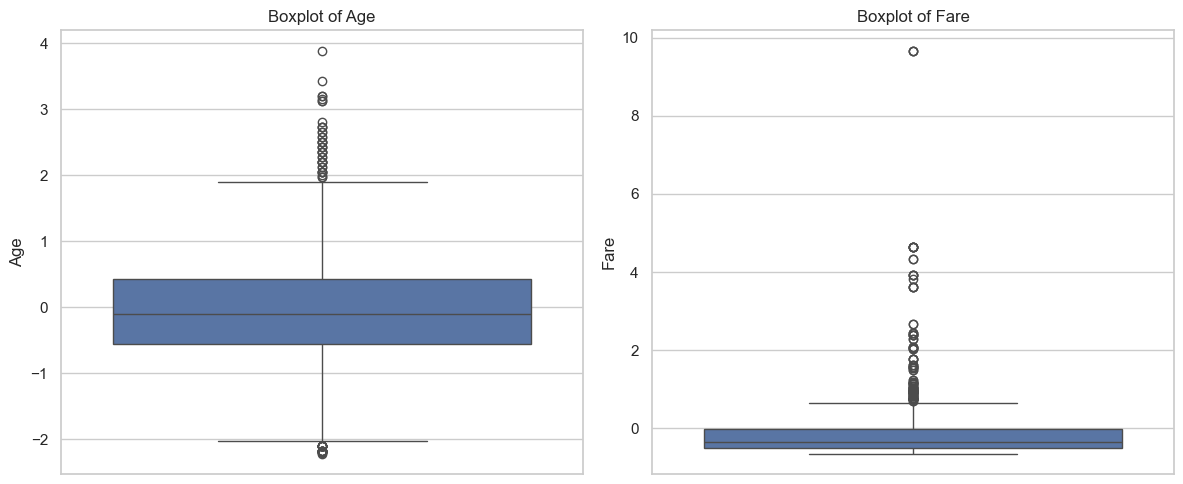

In [19]:
# Set style
sns.set(style="whitegrid")

# Plot boxplots
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(y=df['Age'])
plt.title('Boxplot of Age')

plt.subplot(1, 2, 2)
sns.boxplot(y=df['Fare'])
plt.title('Boxplot of Fare')

plt.tight_layout()
plt.show()


In [20]:
# Define a function to remove outliers based on IQR
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Apply it to Age and Fare
df = remove_outliers_iqr(df, 'Age')
df = remove_outliers_iqr(df, 'Fare')


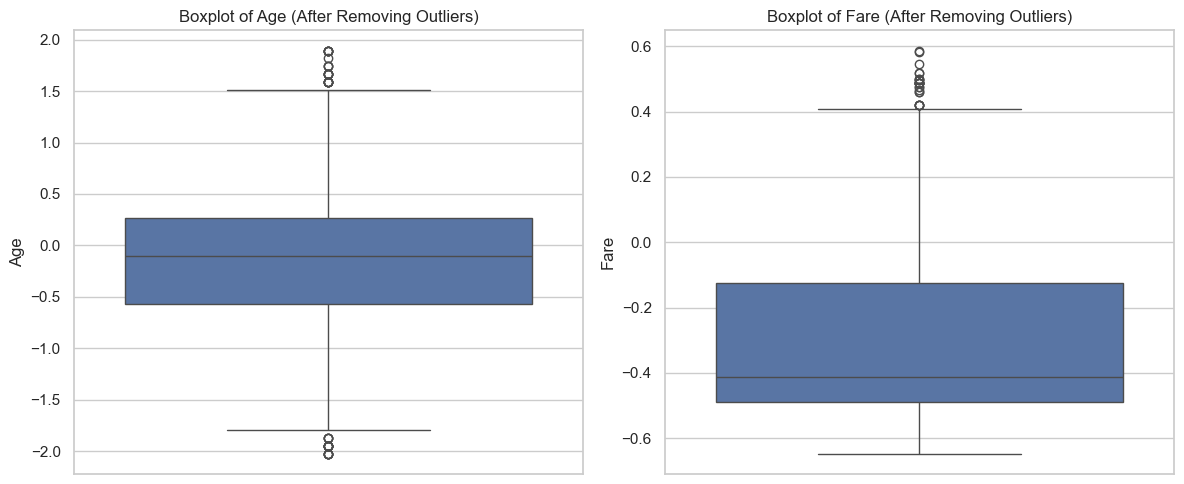

In [21]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(y=df['Age'])
plt.title('Boxplot of Age (After Removing Outliers)')

plt.subplot(1, 2, 2)
sns.boxplot(y=df['Fare'])
plt.title('Boxplot of Fare (After Removing Outliers)')

plt.tight_layout()
plt.show()


In [22]:
# Only convert boolean columns
bool_cols = df.select_dtypes(include='bool').columns
df[bool_cols] = df[bool_cols].astype(int)


In [23]:
print(df.head())

   PassengerId  Survived  Pclass       Age  SibSp  Parch      Fare  HasCabin  \
0            1         0       3 -0.565736      1      0 -0.502445         0   
2            3         1       3 -0.258337      0      0 -0.488854         0   
3            4         1       1  0.433312      1      0  0.420730         1   
4            5         0       3  0.433312      0      0 -0.486337         0   
5            6         0       3 -0.104637      0      0 -0.478116         0   

   Sex_male  Embarked_Q  ...  Ticket_Prefix_SOTON/O.Q.  \
0         1           0  ...                         0   
2         0           0  ...                         0   
3         0           0  ...                         0   
4         1           0  ...                         0   
5         1           1  ...                         0   

   Ticket_Prefix_SOTON/O2  Ticket_Prefix_SOTON/OQ  Ticket_Prefix_STON/O  \
0                       0                       0                     0   
2                   

In [24]:
df.reset_index(drop=True, inplace=True)


In [25]:
print(df.head())

   PassengerId  Survived  Pclass       Age  SibSp  Parch      Fare  HasCabin  \
0            1         0       3 -0.565736      1      0 -0.502445         0   
1            3         1       3 -0.258337      0      0 -0.488854         0   
2            4         1       1  0.433312      1      0  0.420730         1   
3            5         0       3  0.433312      0      0 -0.486337         0   
4            6         0       3 -0.104637      0      0 -0.478116         0   

   Sex_male  Embarked_Q  ...  Ticket_Prefix_SOTON/O.Q.  \
0         1           0  ...                         0   
1         0           0  ...                         0   
2         0           0  ...                         0   
3         1           0  ...                         0   
4         1           1  ...                         0   

   Ticket_Prefix_SOTON/O2  Ticket_Prefix_SOTON/OQ  Ticket_Prefix_STON/O  \
0                       0                       0                     0   
1                   